In [21]:
"""
Making Plots in STA130

- Go to plotly or seaborn and look for a certain plot 
- Give chatgpt your data and the type of plot you want and ask it to make a plot for you
"""

'\nMaking Plots in STA130\n\n- Go to plotly or seaborn and look for a certain plot \n- Give chatgpt your data and the type of plot you want and ask it to make a plot for you\n'

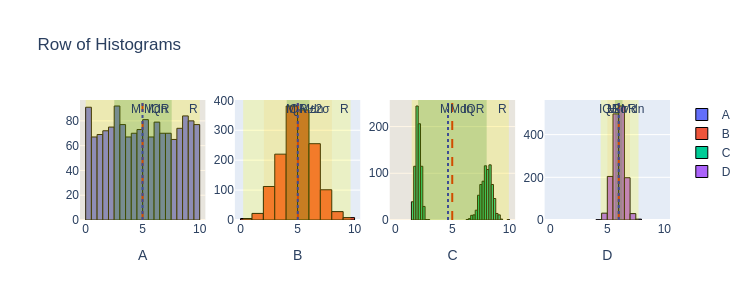

In [22]:
#Sept 23, 2024

#Task 1

from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)

# Calculate statistics for the datasets
means = [np.mean(data1), np.mean(data2), np.mean(data3), np.mean(data4)]
medians = [np.median(data1), np.median(data2), np.median(data3), np.median(data4)]
iqrs = [np.percentile(data1, [25, 75]), np.percentile(data2, [25, 75]), 
        np.percentile(data3, [25, 75]), np.percentile(data4, [25, 75])]
std_devs = [np.std(data1), np.std(data2), np.std(data3), np.std(data4)]
ranges = [(np.min(data1), np.max(data1)), (np.min(data2), np.max(data2)), 
          (np.min(data3), np.max(data3)), (np.min(data4), np.max(data4))]

# Add vertical lines (vline) for the mean and median
for i, (mean, median) in enumerate(zip(means, medians), start=1):
    fig.add_vline(x=mean, line=dict(color="red", width=2, dash="dash"), row=1, col=i, annotation_text="M", annotation_position="top left")
    fig.add_vline(x=median, line=dict(color="blue", width=2, dash="dot"), row=1, col=i, annotation_text="Mdn", annotation_position="top right")

# Add vertical rectangles (vrect) for ranges, IQR, and ±2 standard deviations
for i, (range_vals, iqr, std_dev, mean) in enumerate(zip(ranges, iqrs, std_devs, means), start=1):
    # Range (min to max)
    fig.add_vrect(x0=range_vals[0], x1=range_vals[1], fillcolor="yellow", opacity=0.2, line_width=0, row=1, col=i, annotation_text="R")
    
    # Interquartile Range (IQR: 25th to 75th percentile)
    fig.add_vrect(x0=iqr[0], x1=iqr[1], fillcolor="green", opacity=0.2, line_width=0, row=1, col=i, annotation_text="IQR")

    # ±2 Standard Deviations from the mean
    fig.add_vrect(x0=mean - 2 * std_dev, x1=mean + 2 * std_dev, fillcolor="orange", opacity=0.1, line_width=0, row=1, col=i, annotation_text="±2σ")

# Show the updated plot
fig.show(renderer="png")


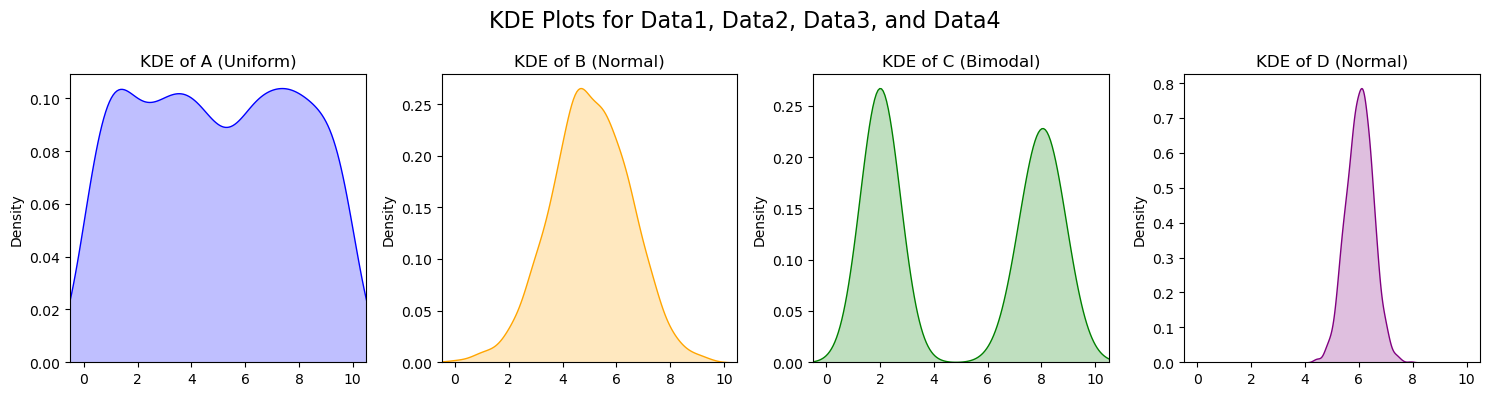

In [24]:
#Task 2

from scipy import stats
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

# Create a figure with 4 subplots, corresponding to the 4 datasets
fig, axes = plt.subplots(1, 4, figsize=(15, 4))

# KDE plot for data1
sns.kdeplot(data1, ax=axes[0], color='blue', fill=True)
axes[0].set_title('KDE of A (Uniform)')
axes[0].set_xlim(-0.5, 10.5)

# KDE plot for data2
sns.kdeplot(data2, ax=axes[1], color='orange', fill=True)
axes[1].set_title('KDE of B (Normal)')
axes[1].set_xlim(-0.5, 10.5)

# KDE plot for data3
sns.kdeplot(data3, ax=axes[2], color='Green', fill=True)
axes[2].set_title('KDE of C (Bimodal)')
axes[2].set_xlim(-0.5, 10.5)

# KDE plot for data4
sns.kdeplot(data4, ax=axes[3], color='purple', fill=True)
axes[3].set_title('KDE of D (Normal)')
axes[3].set_xlim(-0.5, 10.5)

# Set a common title for the row of KDE plots
fig.suptitle('KDE Plots for Data1, Data2, Data3, and Data4', fontsize=16)

plt.tight_layout()
plt.show()


In [ ]:
"""
ChatGPT Log: https://chatgpt.com/share/66f5631d-8680-8012-b447-605a8034157c


Summary of our interaction:
Here's a summary of our conversation:

    Plotly Histograms:
        You generated histograms for four datasets (data1, data2, data3, and data4), each with different distributions (uniform, normal, bimodal, etc.) using Plotly. You customized the histograms by adjusting the bin counts and adding black outlines on the bars.

    Marking Statistical Values:
        We discussed how to mark the mean, median, and ranges like the interquartile range (IQR), range, and ±2 standard deviations using fig.add_vline() for vertical lines and fig.add_vrect() for vertical rectangles in the Plotly histograms. This highlighted key statistics for each dataset.

    Kernel Density Estimation (KDE) using Seaborn:
        You asked how to generate KDE plots for the same datasets using Seaborn. We discussed how to create a row of KDE plots with sns.kdeplot() for each dataset. This smooths out the distribution into a probability density function and provides an alternative visualization to histograms.
"""

In [ ]:
#Task 3

"""
After revising with ChatGPT I have learned that:

Box plots are:

Ideal for showing IQR and Median. Especially median, the line on the box plot indicates where the middle data
value lies within the IQR. This is great for showing whether the data is leaning towards the left or the right and provides
hints as to whether or not outliers may exist.

Not ideal for showing sample sizes in data and extrema values. 

-------------------------------------------------------------------------------------------------------------------------
Kernal Density Estimators (KDE) are:

Good at generalizing/averaging out data to 'smooth' the curve. Not only is this visually appealing to the eye, but it is 
also beneficial when looking for inital assumptions.

KDE's does not show mean, median and IQR. These metrics can be interpreted but it will become a challenge when the 
data distribution is bimodal or multimodal.


--------------------------------------------------------------------------------------------------------------------------

Histograms are:

Good at displaying sample size, data spread and clusters. Given how raw the data on histograms are, it is beneficial to use
them when we want to categorically sort data as this makes it easy to feed into other graphs. In addition, they can be used
to quickly identify the peaks and troughs of data points (range).


Histograms like KDE's do no t explicitly show mean median and IQR. As a result, if the distribution of the data is not 
favourably curved, it will be challenging to determain these metrics via histogram. 

"""


"""
Chatlog with ChatGPT:https://chatgpt.com/share/66f57151-6adc-8012-a8a9-7c810024aba0

Summary of interaction: 
Here’s a summary of our interaction:

    Differences Between Box Plots, Histograms, and KDEs:
        Box plots show the Interquartile Range (IQR) and median but do not represent sample size or mean directly.
        Histograms and KDEs both show distributions, but histograms use discrete bins, while KDEs create smooth, continuous density estimates.
        Box plots are good for displaying median and IQR, while histograms show the range of data effectively.
        KDEs and box plots can give insights into data spread and are helpful for identifying standard deviation patterns.

    Why Box Plots Show the Median:
        The median is shown in box plots because it is a robust measure of central tendency, especially in non-symmetric distributions, and represents the middle value. It's displayed as the central line within the box.

    Importance of Smooth Estimates:
        Smooth estimates (e.g., KDEs) are important for visualizing the underlying distribution of data by reducing noise and revealing trends. They make it easier to interpret patterns, avoid overfitting, and identify anomalies. Smoothing also balances local and global features, leading to clearer, more interpretable insights.


"""

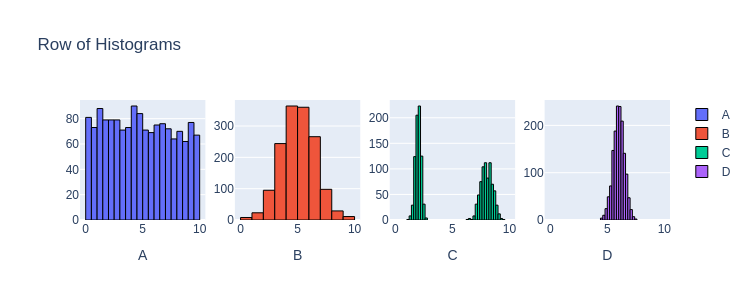

In [16]:
#Task 4

from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS


"""
1. Graph B and D have similar means and the most similar variance of the 4 graphs

2. Graph B and C have similar means but different variances, most of C's data points are much futher away from the mean compared to B

3. Graph A and C have may have different means but similar variance 

4. Graph D and Graph A have different means and different variances
"""

In [1]:
# POST LECTURE HW

#Task 5

"""
- Mean and median are both measures of central tendancy,
    However extreme outliers have more weight in shifting the mean around
    
- A skewed data set occurs when the mean and median are not aligned

    A data set is skewed left, if the 'tail' of the graph points left,
    - this means there are more points towards the left side of the graph thus pull the mean left as well
    
    A data set with a right skewed has their 'tail' pointing right
    - since more of the data points exist on the right, the mean is pulled rightwards

"""

In [3]:
#Task 6

# Maybe something like this? Feel free to use this one 
# if it strikes your fancy after look around a bit
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")
df # df.columns






,restaurant id,category id,item id,serving size (oz),calories,calories from fat,total fat (g),total fat (% daily value),saturated fat (g),saturated fat (% daily value),...,carbohydrates (g),carbohydrates (% daily value),dietary fiber (g),dietary fiber (% daily value),sugars (g),protein (g),vitamin a (% daily value),vitamin c (% daily value),calcium (% daily value),iron (% daily value)
0,1000,100,0,4.8,300,120.0,13.0,20.0,5.0,25.0,...,31,10.0,4,17.0,3.0,17.0,10.0,0.0,25.0,15.0
1,1000,100,1,4.8,250,70.0,8.0,12.0,3.0,15.0,...,30,10.0,4,17.0,3.0,18.0,6.0,0.0,25.0,8.0
2,1000,100,2,3.9,370,200.0,23.0,35.0,8.0,42.0,...,29,10.0,4,17.0,2.0,14.0,8.0,0.0,25.0,10.0
3,1000,100,3,5.7,450,250.0,28.0,43.0,10.0,52.0,...,30,10.0,4,17.0,2.0,21.0,15.0,0.0,30.0,15.0
4,1000,100,4,5.7,400,210.0,23.0,35.0,8.0,42.0,...,30,10.0,4,17.0,2.0,21.0,6.0,0.0,25.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,3000,130,745,NaN,180,NaN,14.0,NaN,NaN,NaN,...,12,NaN,3,NaN,NaN,4.0,NaN,NaN,NaN,NaN
746,3000,130,746,NaN,190,NaN,18.0,NaN,NaN,NaN,...,6,NaN,3,NaN,NaN,7.0,NaN,NaN,NaN,NaN
747,3000,100,747,NaN,340,NaN,13.0,NaN,NaN,NaN,...,38,NaN,0,NaN,NaN,18.0,NaN,NaN,NaN,NaN
748,3000,100,748,NaN,90,NaN,8.0,NaN,NaN,NaN,...,5,NaN,4,NaN,NaN,1.0,NaN,NaN,NaN,NaN


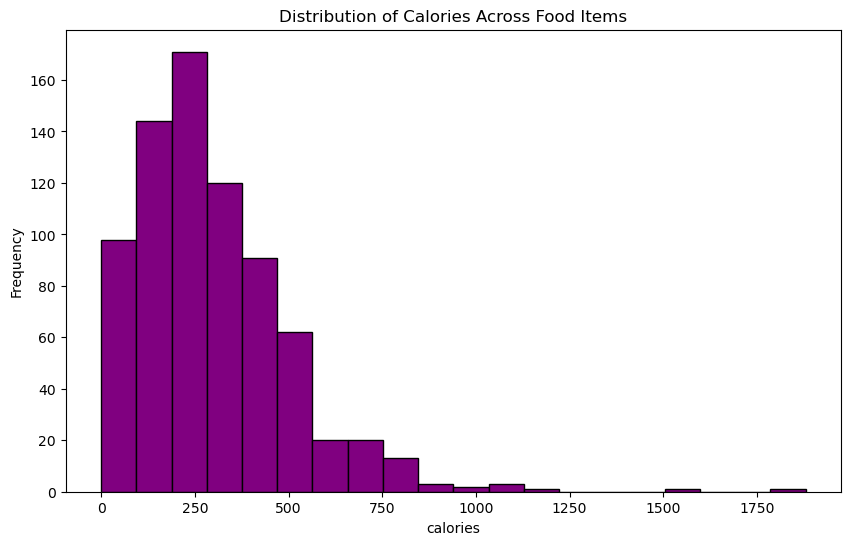

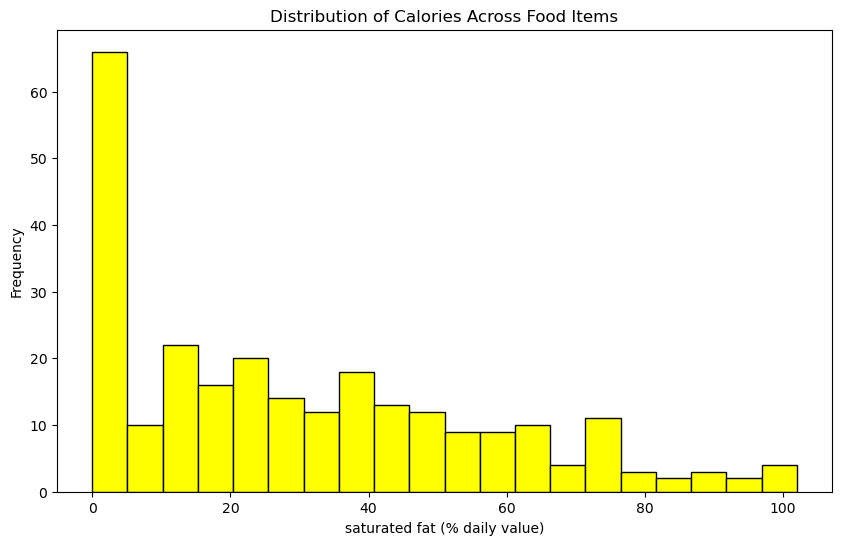

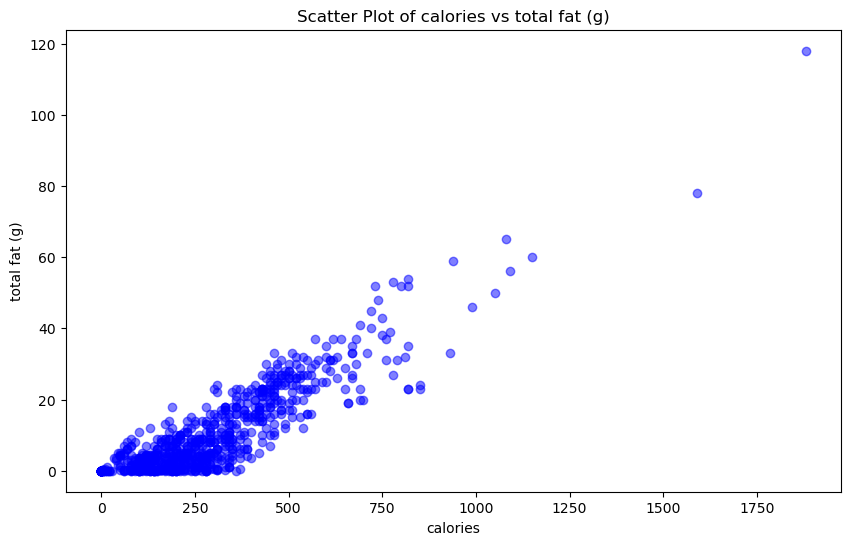

In [20]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the CSV file
url = "https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv"
df = pd.read_csv(url)

# Create a histogram of calories
plt.figure(figsize=(10, 6))
plt.hist(df['calories'], bins=20, color='purple', edgecolor='black')
plt.xlabel('calories')
plt.ylabel('Frequency')
plt.title('Distribution of Calories Across Food Items')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['saturated fat (% daily value)'], bins=20, color='yellow', edgecolor='black')
plt.xlabel('saturated fat (% daily value)')
plt.ylabel('Frequency')
plt.title('Distribution of Calories Across Food Items')
plt.show()

df['calories'] = pd.to_numeric(df['calories'], errors='coerce')
df['total fat (g)'] = pd.to_numeric(df['total fat (g)'], errors='coerce')

# Drop rows where calories or total fat (g) are NaN (optional but recommended for cleaner plots)
df_clean = df.dropna(subset=['calories', 'total fat (g)'])

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['calories'], df_clean['total fat (g)'], color='blue', alpha=0.5)

# Add labels and title
plt.xlabel('calories')
plt.ylabel('total fat (g)')
plt.title('Scatter Plot of calories vs total fat (g)')

# Display the plot
plt.show()

"""
The graphs demonstrate that on average most fast food items have low calories and low total fat.

When placed together in a scatterplot we can see the clustter of points around low fat and low calories confirming
the correlation between the two sets of data.

The last graph (KDE) on the cell below however indicates that there is a much larger cluster around a certain total fat bin,
and a more relatively distributed graph of calories.
"""

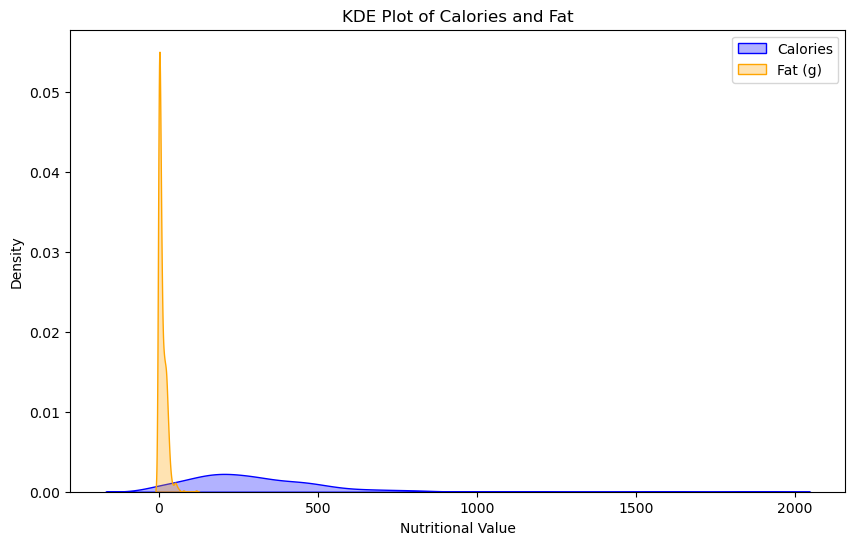

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv"
df = pd.read_csv(url)

# Ensure Calories and Fat columns are numeric
df['calories'] = pd.to_numeric(df['calories'], errors='coerce')
df['total fat (g)'] = pd.to_numeric(df['total fat (g)'], errors='coerce')

# Drop rows with missing data
df_clean = df.dropna(subset=['calories', 'total fat (g)'])

# Create a KDE plot for Calories and Fat
plt.figure(figsize=(10, 6))
sns.kdeplot(df_clean['calories'], label='Calories', color='blue', fill=True, alpha=0.3)
sns.kdeplot(df_clean['total fat (g)'], label='Fat (g)', color='orange', fill=True, alpha=0.3)

# Add labels and title
plt.xlabel('Nutritional Value')
plt.ylabel('Density')
plt.title('KDE Plot of Calories and Fat')
plt.legend()

# Display the plot
plt.show()